# Household Asset and Food Security Profiles in an Irrigation Context

## Bill Odiase

Project M2 Submission
B1, Team 1

## Data Dictionary

| variable | class | description |
|---|---|---|
| key_ID | integer | Added to provide a unique Id for each observation. (The InstanceID field does this as well but it is not as convenient to use) |
| village | character | Village name |
| interview_date | character | Date of interview |
| no_membrs | integer | Number of members in the household |
| years_liv | integer | Number of years living in this village or a neighboring village |
| respondent_wall_type | character | Type of walls the house has |
| rooms | integer | Number of rooms in the main house used for sleeping |
| memb_assoc | character | Are you a member of an irrigation association? |
| affect_conflicts | character | Have you been affected by conflicts with other irrigators in the area? |
| liv_count | integer | Livestock count |
| items_owned | character | Items owned by the household |
| no_meals | integer | How many meals do people in your household normally eat in a day? |
| months_lack_food | character | Indicate which months, in the last 12 months have you faced a situation when you did not have enough food to feed the household? |
| instanceID | character | Unique identifier for the form data submission |

## Loading Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
raw_data = pd.read_csv('/content/drive/Othercomputers/My Mac/Github/Unsupervised-and-Unstructured-Machine-Learning/project files/safi_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = raw_data.copy()
display(df.head(5))

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,God,2016-11-17T00:00:00Z,10,15,burntbricks,1,NaN,NaN,1,solar_torch,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,God,2016-11-17T00:00:00Z,7,6,burntbricks,1,NaN,NaN,2,bicycle;radio;cow_plough;solar_panel;mobile_phone,2,Sept;Oct;Nov;Dec,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,NaN,NaN,4,motorcyle;radio;cow_plough;mobile_phone,2,Aug;Sept;Oct;Nov,uuid:2c867811-9696-4966-9866-f35c3e97d02d


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key_ID                131 non-null    int64 
 1   village               131 non-null    object
 2   interview_date        131 non-null    object
 3   no_membrs             131 non-null    int64 
 4   years_liv             131 non-null    int64 
 5   respondent_wall_type  131 non-null    object
 6   rooms                 131 non-null    int64 
 7   memb_assoc            92 non-null     object
 8   affect_conflicts      92 non-null     object
 9   liv_count             131 non-null    int64 
 10  items_owned           121 non-null    object
 11  no_meals              131 non-null    int64 
 12  months_lack_food      131 non-null    object
 13  instanceID            131 non-null    object
dtypes: int64(6), object(8)
memory usage: 14.5+ KB


## Data Cleaning & Exploratory Data Analysis

In [ ]:
df.isnull().sum()

,0
key_ID,0
village,0
interview_date,0
no_membrs,0
years_liv,0
respondent_wall_type,0
rooms,0
memb_assoc,39
affect_conflicts,39
liv_count,0


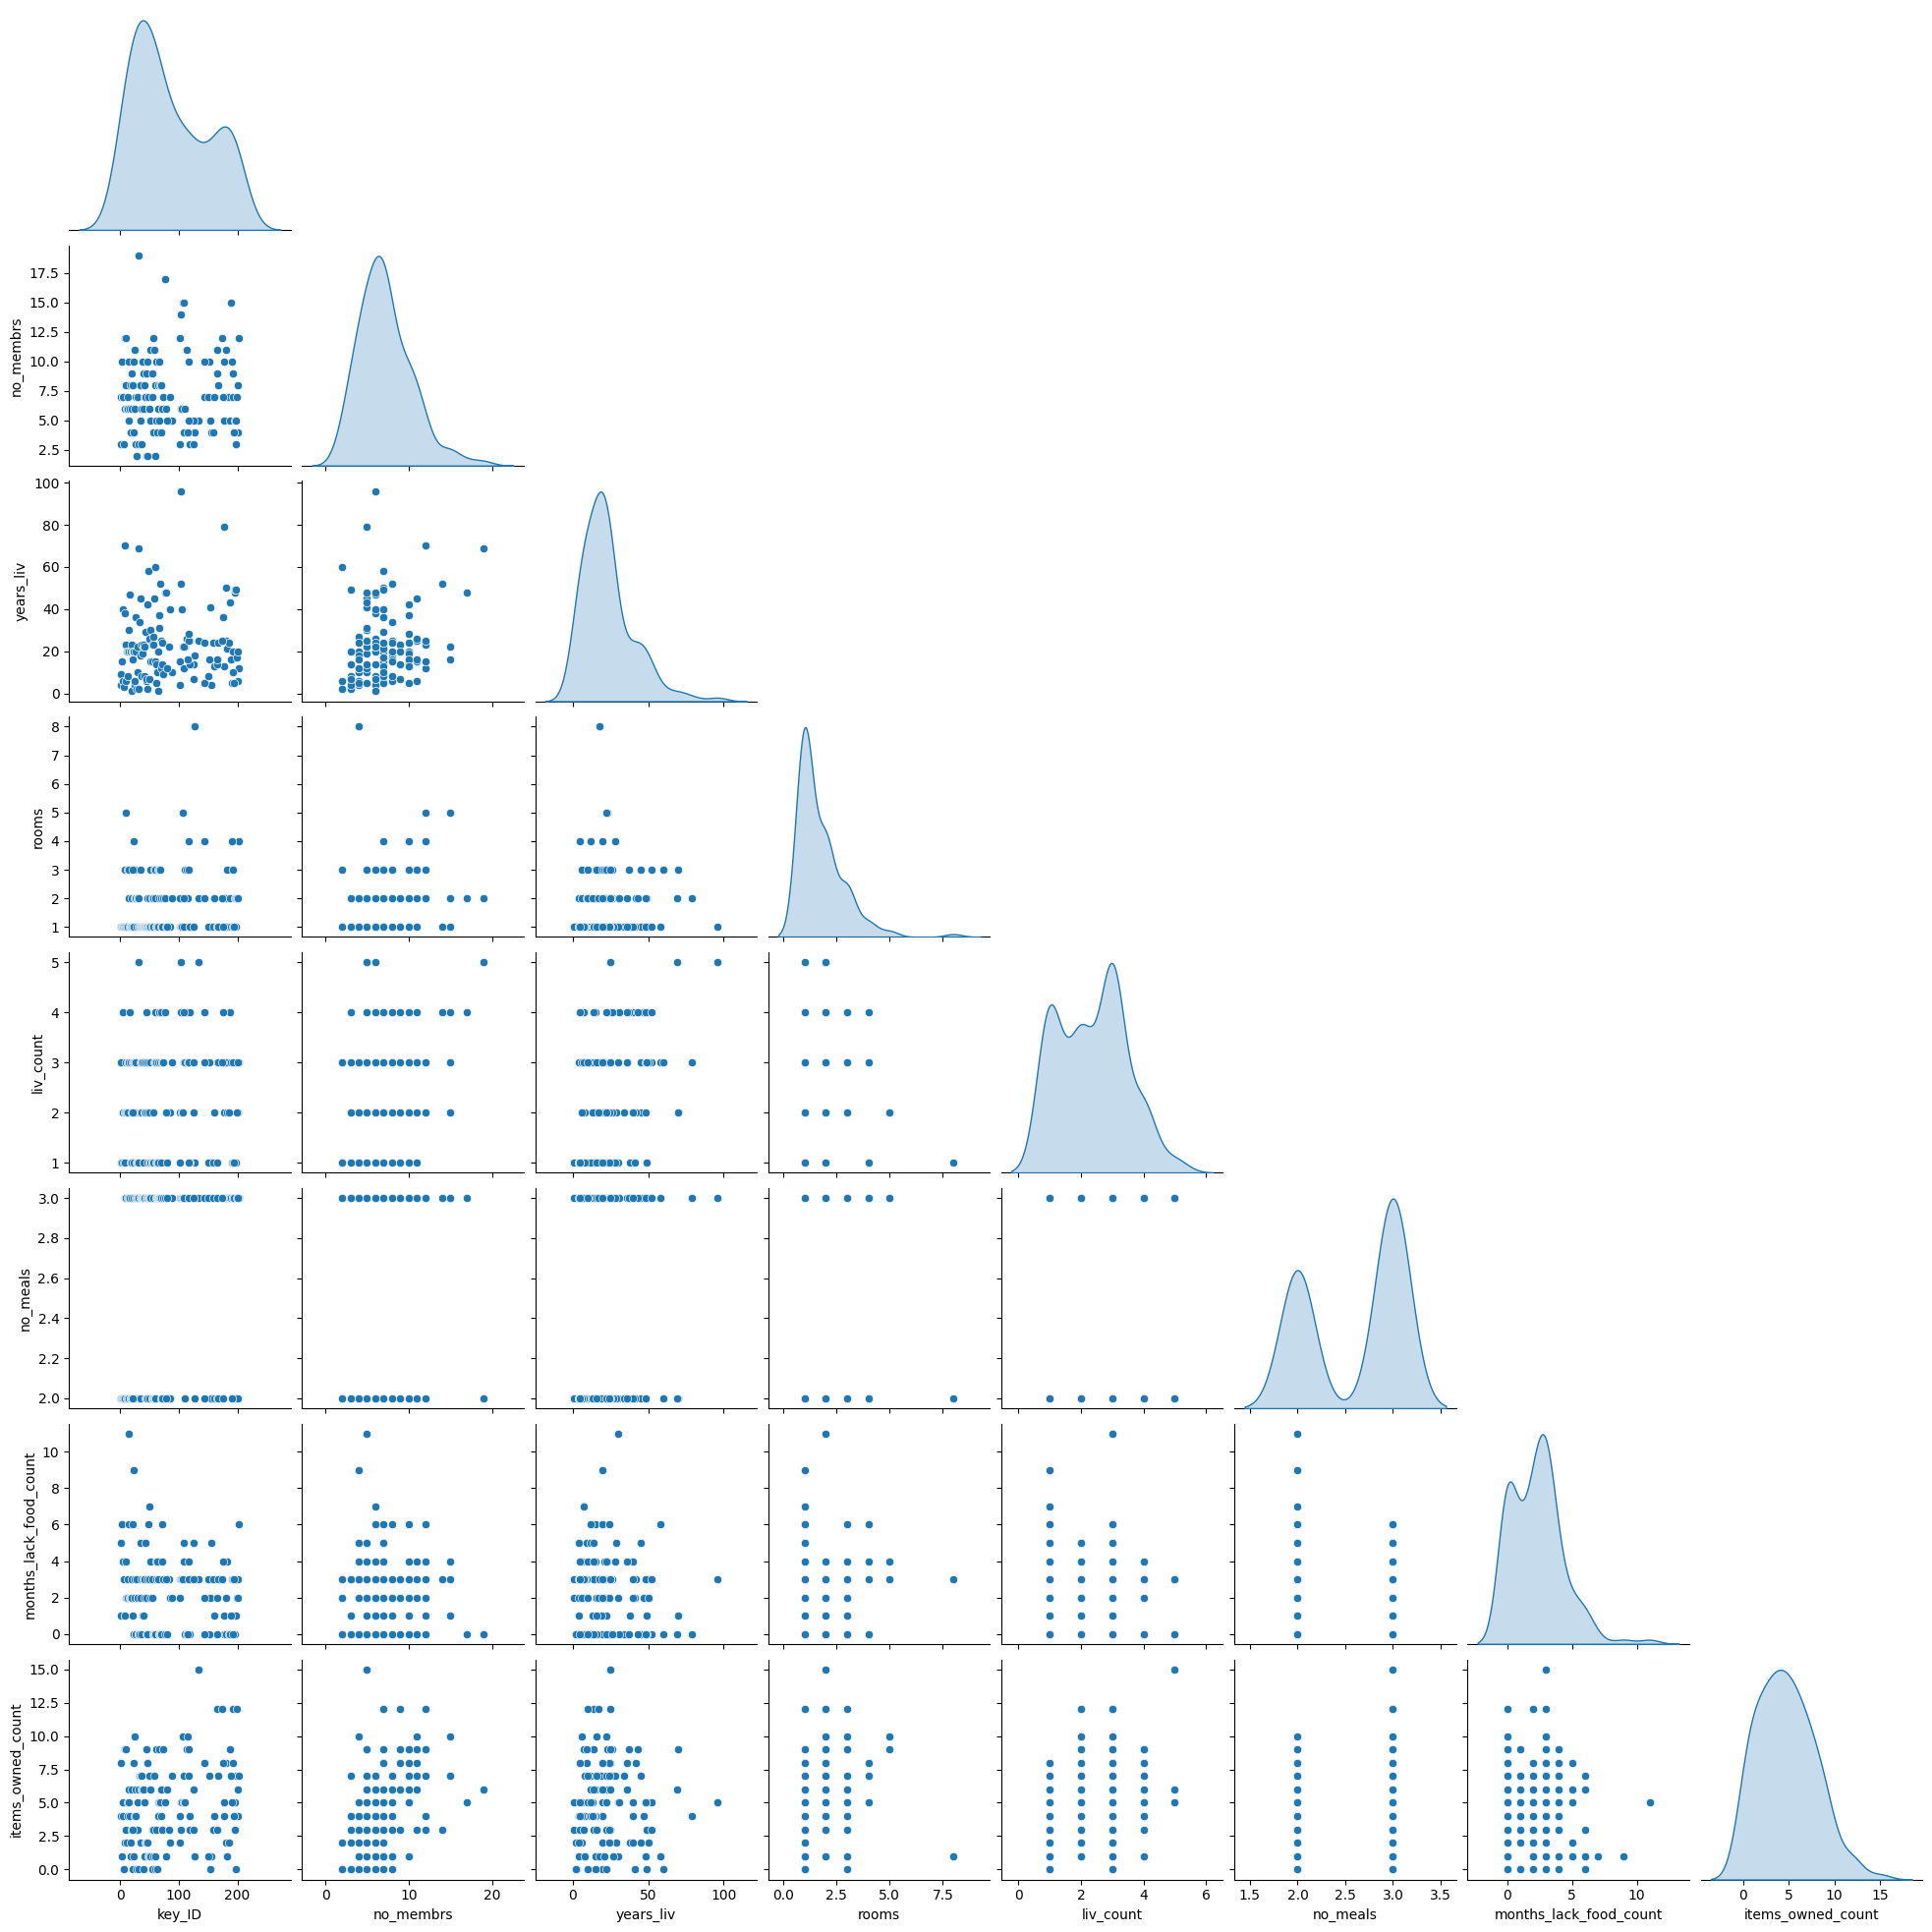

In [ ]:
sns.pairplot(data = df, kind='scatter', diag_kind='kde', corner=True)

*   "no_membrs", "years_liv", and "rooms" all have right-skew (few high-end values, no extreme outliers)
*   weak correlation between variables (complex, non-linear relationships) (for example, household size does not mean high number of rooms)
*   majority of households have lived in there area roughly 0-25 years (more sparse as it increases)





In [ ]:
print(df["memb_assoc"].unique())
print(df['affect_conflicts'].unique())
print(df['village'].unique())
print(df['respondent_wall_type'].unique())

# fix missing and duplicate responses
df["memb_assoc_eda"] = df["memb_assoc"].fillna("unknown").str.lower().str.strip()
df["affect_conflicts_eda"] = df["affect_conflicts"].fillna("unknown").str.lower().str.strip()
df["respondent_wall_type_eda"] = df["respondent_wall_type"].fillna("unknown").str.lower().str.strip()
df["items_owned"] = df["items_owned"].fillna("unknown").str.lower().str.strip()


[nan 'yes' 'no']
[nan 'once' 'never' 'more_once' 'frequently']
['God' 'Chirodzo' 'Ruaca']
['muddaub' ' muddaub' ' burntbricks' 'burntbricks' 'sunbricks' 'cement']




*   Categorical columns were missing some values which I opted to fill with "unknown." Additionally, these variables also required some standardization (white space causing duplicates).



### Food Insecurity

#### Q: How many months did households face food insecurity?

In [ ]:
# split string into list
df["months_lack_food_list"] = df["months_lack_food"]
df["months_lack_food_list"] = df['months_lack_food_list'].str.strip().str.split(';')

# get the number of months each household experienced food-scarcity
df['months_lack_food_count'] = df['months_lack_food_list'].apply(lambda x: len([m for m in x if m.strip() not in ["none", ""]]))
print(df[["months_lack_food_list", "months_lack_food_count"]].sample(5))

df['months_lack_food_count'].describe()

   months_lack_food_list  months_lack_food_count
56                [none]                       0
8             [Jan, Dec]                       2
19            [Oct, Nov]                       2
73                [none]                       0
32                [none]                       0


,months_lack_food_count
count,131.000000
mean,2.320611
std,1.997179
min,0.000000
25%,0.000000
50%,2.000000
75%,3.000000
max,11.000000


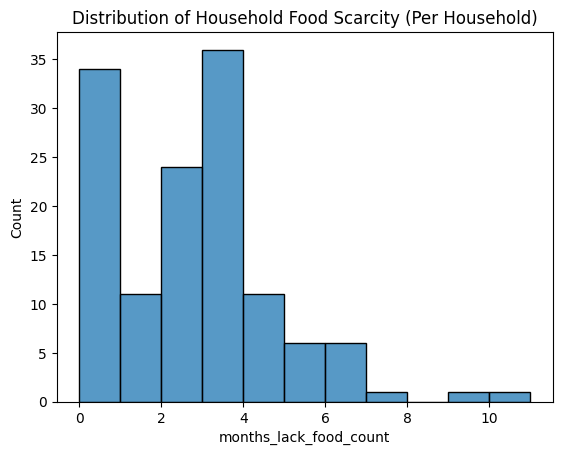

In [ ]:
sns.histplot(df["months_lack_food_count"], bins = 11)
plt.title("Distribution of Household Food Scarcity (Per Household)")
plt.show()



*   right-skewed (majority of households not experiencing food insecurity for long, however there is a small tail experiencing for considerably long periods)



#### Q: Per village, how many months did households face food insecurity?

In [ ]:
df[["months_lack_food_count", "village"]].groupby("village").describe()

months_lack_food_count                                              
                          count      mean       std  min  25%  50%  75%   max
village                                                                      
Chirodzo                   39.0  2.102564  1.902835  0.0  0.0  2.0  3.0   7.0
God                        43.0  3.000000  2.329929  0.0  1.0  3.0  4.0  11.0
Ruaca                      49.0  1.897959  1.597458  0.0  0.0  2.0  3.0   6.0



*   average food scarcity does not drastically differ between villages (1-2 difference)
*   variation within villages in periods of insecurity (with that being said, 75 % fall into 3-4 months or less so validates that food security above that is not common)


#### Q: Which month appears most often when food insecurity occurs?

In [ ]:
# turn one with a list into one row per item
months = df["months_lack_food_list"].explode().str.strip()

# exclude "none"
months_excluding_na = months[months != "none"]

# get the count for each item
month_count = months_excluding_na.value_counts()

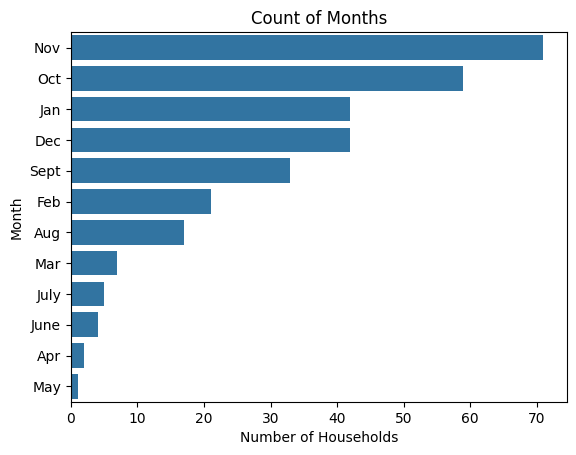

In [ ]:
sns.barplot(x=month_count.values, y=month_count.index,)
plt.title("Count of Months")
plt.xlabel("Number of Households")
plt.ylabel("Month")
plt.show()



*   October - January is high frequency period for food scarcity (scarcity not random; suggests seasonality?)
*   data is aggregated across all villages (village-level may show that this differs by village, but not yet explored)


### Items Owned

#### Q: How many items do households own?

In [ ]:
# split string into list
df["items_owned_list"] = df["items_owned"]
df["items_owned_list"] = df['items_owned_list'].str.strip().str.split(';')

# get the number of items each household reported
df['items_owned_count'] = df['items_owned_list'].apply(lambda x: len([i for i in x if i.strip() != "unknown"]))
print(df[["items_owned_list", "items_owned_count"]].sample(5))

df['items_owned_count'].describe()

                                      items_owned_list  items_owned_count
21                                             [radio]                  1
130  [radio, cow_plough, solar_panel, solar_torch, ...                  6
31   [cow_cart, motorcyle, radio, cow_plough, solar...                  6
126                    [motorcyle, radio, solar_panel]                  3
94   [bicycle, radio, cow_plough, solar_panel, sola...                  7


,items_owned_count
count,131.000000
mean,4.740458
std,3.153966
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,15.000000


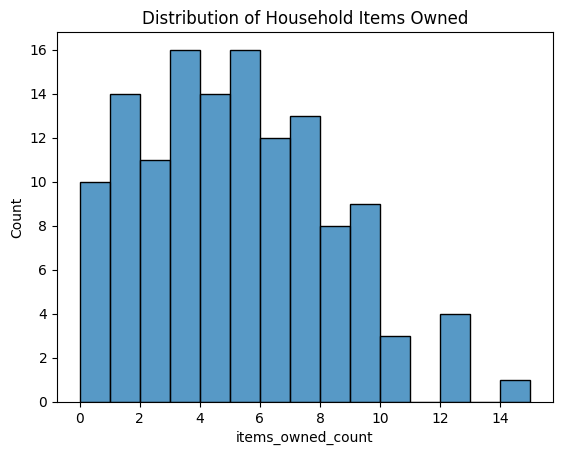

In [ ]:
sns.histplot(df["items_owned_count"], bins = 15)
plt.title("Distribution of Household Items Owned")
plt.show()

*   slight right-skew and high variance within population
*   highest concentration around 3-8 items, drops after 10 (outliers)
*   could indicate a small group of "rich" households (either asset-rich or income too but we don't have exact income data)compared to others
*   should explore the relationship between asset ownershp and greater food security (higher assets, less food scarcity or are there households still with a lot of assets but still going through periods of food scarcity)

#### Q: Which items appears most?

In [ ]:
# turn one with a list into one row per item
items = df["items_owned_list"].explode().str.strip()

# exclude "unknown"
items_excluding_na = items[items != "unknown"]

# get the count for each item
item_count = items_excluding_na.value_counts()

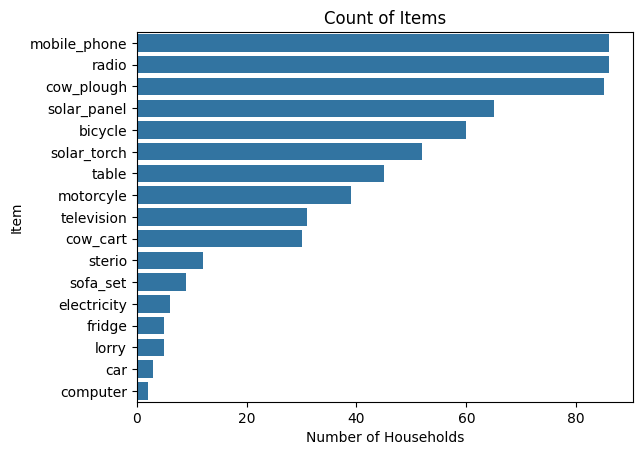

In [ ]:
sns.barplot(x=item_count.values, y=item_count.index,)
plt.title("Count of Items")
plt.xlabel("Number of Households")
plt.ylabel("Item")
plt.show()



*   5-6 (roughly 31%) items are common across households
*   other items are more varied/less guarenteed
*   suppose this means asset ownership will contribute well to clustering since items and item composition will likely be very different across households and help to distinguish groups




### Members vs Non-members Comparison

In [ ]:
membership_comparison = df.copy()

# remove records where membership status is "unknown"
membership_comparison = membership_comparison[membership_comparison["memb_assoc_eda"] != "unknown"]

# group variables by membership status
member_summary = membership_comparison.groupby("memb_assoc_eda")[["rooms", "no_membrs", "liv_count", "no_meals", "items_owned_count"]].describe().T
print()



*   similar value ranges with and without irrigation association membership (weak for segmentation by itself)




## Problem Statement: What household profiles emerge based on asset ownership and food availability, and do these profiles differ by irrigation association membership?

### Data Preparation

In [ ]:
m2_df = raw_data.copy()

In [ ]:
#fix missing and duplicate responses
m2_df["memb_assoc"] = m2_df["memb_assoc"].fillna("unknown").str.lower().str.strip()
m2_df["affect_conflicts"] = m2_df["affect_conflicts"].fillna("unknown").str.lower().str.strip()
m2_df["respondent_wall_type"] = m2_df["respondent_wall_type"].fillna("unknown").str.lower().str.strip()
m2_df["items_owned"] = m2_df["items_owned"].fillna("unknown").str.lower().str.strip()

# split string into list
m2_df["months_lack_food_list"] = m2_df["months_lack_food"]
m2_df["months_lack_food_list"] = m2_df['months_lack_food_list'].str.strip().str.split(';')

# get the number of months each household experienced food-scarcity
m2_df['months_lack_food_count'] = m2_df['months_lack_food_list'].apply(lambda x: len([m for m in x if m.strip() not in ["none", ""]]))

# split string into list
m2_df["items_owned_list"] = m2_df["items_owned"]
m2_df["items_owned_list"] = m2_df['items_owned_list'].str.strip().str.split(';')

# get the number of items each household reported
m2_df['items_owned_count'] = m2_df['items_owned_list'].apply(lambda x: len([i for i in x if i.strip() != "unknown"]))

In [ ]:
m2_df = m2_df.drop(columns = ["months_lack_food_list", "months_lack_food", "items_owned_list", "items_owned"])
m2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   key_ID                  131 non-null    int64 
 1   village                 131 non-null    object
 2   interview_date          131 non-null    object
 3   no_membrs               131 non-null    int64 
 4   years_liv               131 non-null    int64 
 5   respondent_wall_type    131 non-null    object
 6   rooms                   131 non-null    int64 
 7   memb_assoc              131 non-null    object
 8   affect_conflicts        131 non-null    object
 9   liv_count               131 non-null    int64 
 10  no_meals                131 non-null    int64 
 11  instanceID              131 non-null    object
 12  months_lack_food_count  131 non-null    int64 
 13  items_owned_count       131 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 14.5+ KB


### Clustering

#### Numeric DataFrame

In [ ]:
cluster_variables = [
    "no_membrs",
    "liv_count",
    "rooms",
    "no_meals",
    "months_lack_food_count",
    "years_liv",
    "items_owned_count"
]

m2_numeric = m2_df[cluster_variables].copy()

In [ ]:
m2_numeric

,no_membrs,liv_count,rooms,no_meals,months_lack_food_count,years_liv,items_owned_count
0,3,1,1,2,1,4,4
1,7,3,1,2,5,9,8
2,10,1,1,2,6,15,1
3,7,2,1,2,4,6,5
4,7,4,1,2,4,40,4
...,...,...,...,...,...,...,...
126,3,3,1,3,3,7,3
127,7,3,3,3,0,10,12
128,4,1,1,3,3,5,4
129,7,2,2,3,2,17,12


#### Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

m2_normalized = pd.DataFrame(
    sc.fit_transform(m2_numeric),
    columns=m2_numeric.columns,
    index=m2_numeric.index
)

m2_normalized

,no_membrs,liv_count,rooms,no_meals,months_lack_food_count,years_liv,items_owned_count
0,-1.326157,-1.266798,-0.680337,-1.232571,-0.663776,-1.130877,-0.235672
1,-0.060390,0.587398,-0.680337,-1.232571,1.346737,-0.834113,1.037441
2,0.888936,-1.266798,-0.680337,-1.232571,1.849365,-0.477995,-1.190506
3,-0.060390,-0.339700,-0.680337,-1.232571,0.844108,-1.012172,0.082607
4,-0.060390,1.514496,-0.680337,-1.232571,0.844108,1.005829,-0.235672
...,...,...,...,...,...,...,...
126,-1.326157,0.587398,-0.680337,0.811312,0.341480,-0.952819,-0.553950
127,-0.060390,0.587398,1.157275,0.811312,-1.166404,-0.774760,2.310554
128,-1.009715,-1.266798,-0.680337,0.811312,0.341480,-1.071525,-0.235672
129,-0.060390,-0.339700,0.238469,0.811312,-0.161148,-0.359289,2.310554


#### Hierarchical Clustering

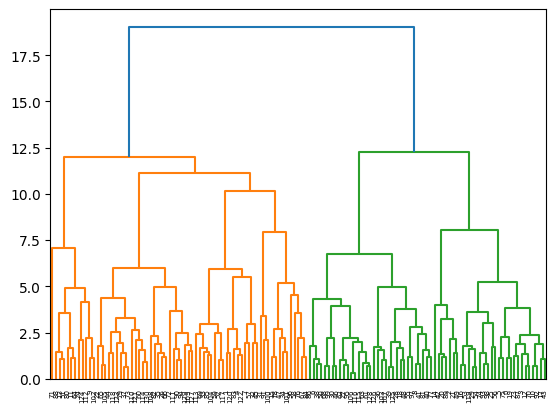

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(m2_normalized, 'ward')
_ = dendrogram(Z)
plt.show()

In [ ]:
n_clusters = 4

m2_normalized["cluster_labels"] = fcluster(Z, n_clusters, criterion='maxclust')
m2_normalized["cluster_labels"].value_counts()

,count
cluster_labels,
2,56
3,33
4,30
1,12




*   opted for 4 clusters because 3-4 seemed to be most natural. beyond that, it feels as though clusters start to get very specific so i think this is better for generalization
*   this cluster size is pretty balanced except for cluster 1 which could be an outlier or extremely distinct group



In [ ]:
m2_normalized.describe()

,no_membrs,liv_count,rooms,no_meals,months_lack_food_count,years_liv,items_owned_count,cluster_labels
count,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,131.000000
mean,6.440989e-17,-1.898397e-16,4.067993e-17,4.339192e-16,4.067993e-17,-6.779988e-18,2.711995e-17,2.618321
std,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,0.940197
min,-1.642598e+00,-1.266798e+00,-6.803375e-01,-1.232571e+00,-1.166404e+00,-1.308936e+00,-1.508784e+00,1.000000
25%,-6.932731e-01,-1.266798e+00,-6.803375e-01,-1.232571e+00,-1.166404e+00,-6.560539e-01,-8.722281e-01,2.000000
50%,-6.038964e-02,-3.397001e-01,-6.803375e-01,8.113124e-01,-1.611480e-01,-1.812304e-01,8.260656e-02,2.000000
75%,5.724938e-01,5.873981e-01,2.384688e-01,8.113124e-01,3.414803e-01,2.639167e-01,7.191630e-01,3.000000
max,3.736911e+00,2.441595e+00,5.751307e+00,8.113124e-01,4.362506e+00,4.329593e+00,3.265389e+00,4.000000


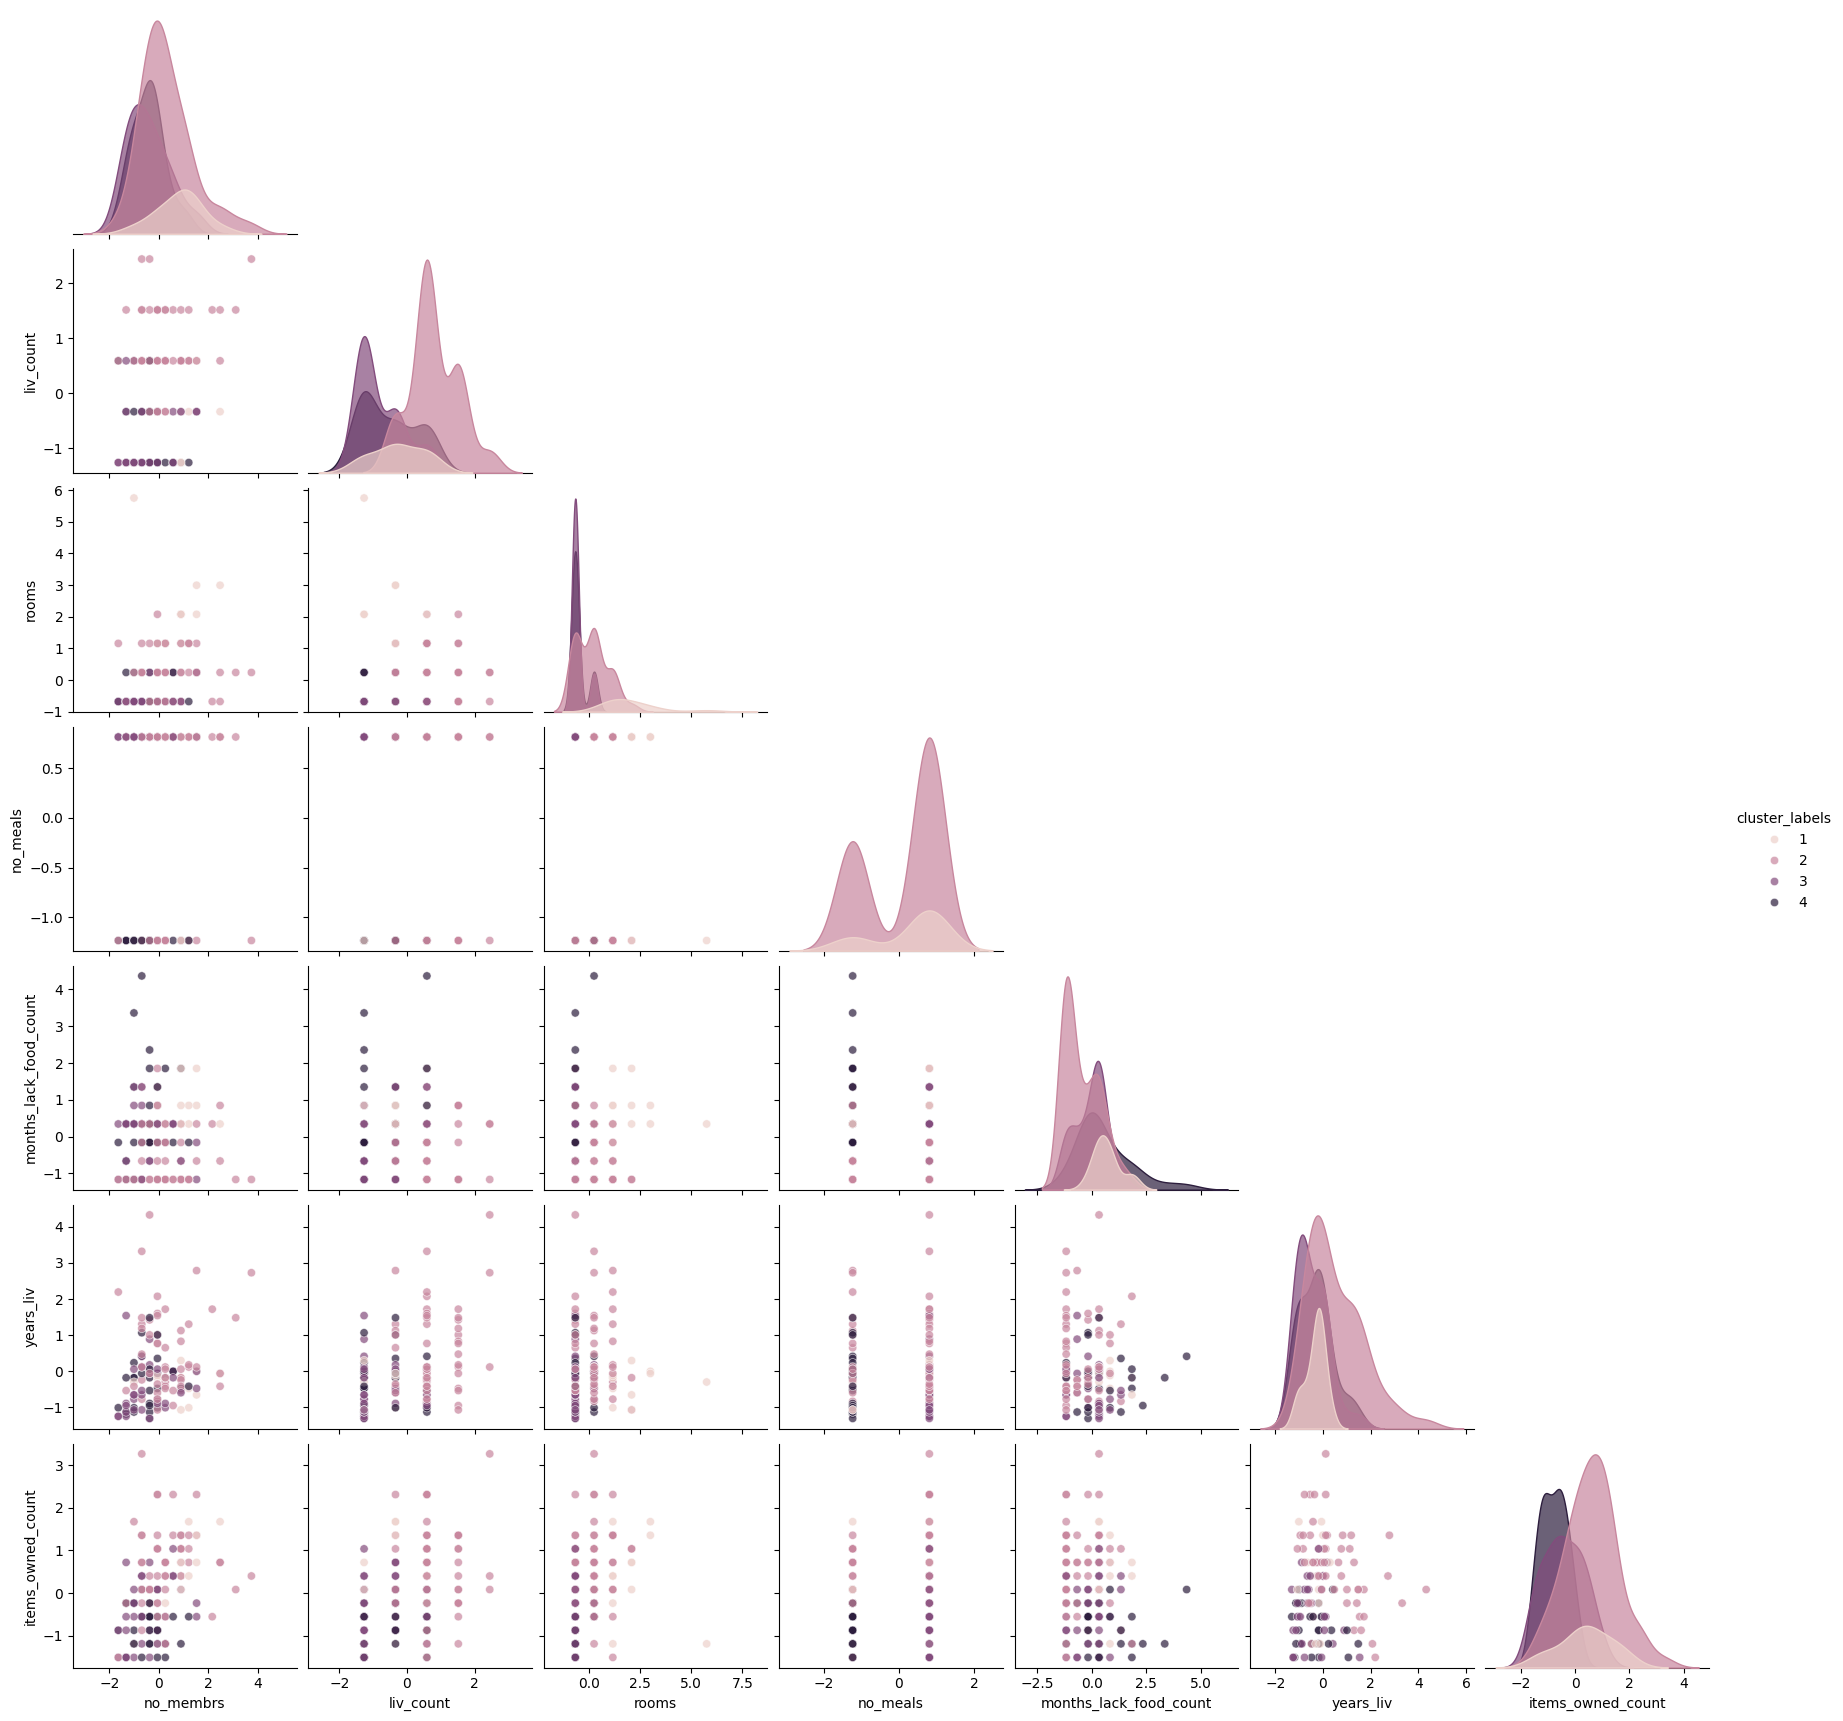

In [ ]:
sns.pairplot(m2_normalized, hue="cluster_labels", kind="scatter", diag_kind="kde" , corner=True,
    plot_kws={'alpha': 0.7},
    diag_kws={'alpha': 0.7}
)



*   pairplot shown on standardized features to match the distance space used for hierarchical clustering




*   Rooms: Room count show right-skew for all clusters (small number of significantly large homes). Cluster 3 and 4 have higher concentration of smaller room counts (small/modest housing compared to clustered 1 and 2).


*   Items Owned: Cluster 3 and 4 reprsent households with lower asset ownerhip. Some correlation with years lived as cluster 2 seemingly has higher asset ownership and average to higher years lived in the village (inverse is also true, those with less than average years lived in the village seem to have less assets)


*   Months Without Food: Cluster 2 represents households with lower food scarcity while cluster 1 and 3 represents those with the high food scarcity.  

*   Livestock: Cluster 1 seems to have majority households with a high livestock count (could potentially point to higher wealth given they also have higher item_count, hence why they are outliers)

*   Relationship Between Assets and Food: The scatter plot suggest that households with higher asset ownership undergo less food scarcity. Cluster 2 in particular display this.

*   Overlapping: Clusters seem to overlap in household size and years lived suggetsing these vairables are weaker for segmentation.

*   Cluster 2 appears to have households with higher item and livestock counts.



In [ ]:
m2_df["cluster"] = m2_normalized["cluster_labels"]
m2_df

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,no_meals,instanceID,months_lack_food_count,items_owned_count,cluster
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,unknown,unknown,1,2,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef,1,4,4
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,2,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,5,8,2
2,3,God,2016-11-17T00:00:00Z,10,15,burntbricks,1,unknown,unknown,1,2,uuid:193d7daf-9582-409b-bf09-027dd36f9007,6,1,4
3,4,God,2016-11-17T00:00:00Z,7,6,burntbricks,1,unknown,unknown,2,2,uuid:148d1105-778a-4755-aa71-281eadd4a973,4,5,4
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,unknown,unknown,4,2,uuid:2c867811-9696-4966-9866-f35c3e97d02d,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,126,Ruaca,2017-05-18T00:00:00Z,3,7,burntbricks,1,no,more_once,3,3,uuid:69caea81-a4e5-4e8d-83cd-9c18d8e8d965,3,3,3
127,193,Ruaca,2017-06-04T00:00:00Z,7,10,cement,3,no,more_once,3,3,uuid:5ccc2e5a-ea90-48b5-8542-69400d5334df,0,12,2
128,194,Ruaca,2017-06-04T00:00:00Z,4,5,muddaub,1,no,more_once,1,3,uuid:95c11a30-d44f-40c4-8ea8-ec34fca6bbbf,3,4,3
129,199,Chirodzo,2017-06-04T00:00:00Z,7,17,burntbricks,2,yes,more_once,2,3,uuid:ffc83162-ff24-4a87-8709-eff17abc0b3b,2,12,2


In [ ]:
# mean of each original variable by cluster
m2_df.groupby("cluster")[cluster_variables].mean()

,no_membrs,liv_count,rooms,no_meals,months_lack_food_count,years_liv,items_owned_count
cluster,,,,,,,
1,9.750000,2.083333,4.000000,2.750000,3.750000,17.500000,5.916667
2,8.160714,3.232143,1.892857,2.660714,1.446429,31.607143,6.607143
3,5.848485,1.515152,1.151515,3.000000,2.242424,15.303030,3.393939
4,5.833333,1.800000,1.200000,2.000000,3.466667,17.833333,2.266667




*   Cluster 1: Largest household size, largest homes, highest food scarcity (large, moderate-asset households with high food vulnerability). These households are better off relative to other clusters (they own more livestock and items, however this is offset by the larger household size. they report higher meals eaten and more months without food so there is additional pressure from the larger households that prevent them from being like cluster 2)

*   Cluster 2: Highest livestock, highest asset ownership, highest years in village, lowest food scarcity (high-asset households with low food vulnerability)

*   Cluster 3: Smaller household size, small homes, moderate/median food scarcity, lower asset ownership  (small, low-asset households with moderate food vulnerability)


*   Cluster 4: Smaller household size, lowest asset ownership, second high food scarcity (low-asset households with high food vulnerability)



In [ ]:
# membership association by cluster
m2_df.groupby("cluster")["memb_assoc"].value_counts()

cluster  memb_assoc
1        no             7
         unknown        3
         yes            2
2        no            26
         yes           21
         unknown        9
3        no            16
         unknown       12
         yes            5
4        unknown       15
         no            10
         yes            5
Name: count, dtype: int64



*   Membership in irrigation association is present in all clusters thus there is not much seperation by membership status

*   Cluster 2 has the highest proportion of households in a membership association. This is also our high-asset and low food scarcity cluster


